In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = [10,6]

In [4]:
tx = pd.read_csv('./mock_treatment_starts_2016.csv')
tx

,PatientID,TreatmentStart,Drug,Dosage
0,PT1,1/14/16,Cisplatin,200
1,PT20,1/2/16,Cisplatin,140
2,PT2,1/10/16,Cisplatin,180
3,PT3,1/24/16,Cisplatin,140
4,PT4,2/14/16,Cisplatin,200
5,PT19,2/10/16,Cisplatin,180
6,PT5,2/6/16,Cisplatin,190
7,PT6,3/1/16,Cisplatin,180
8,PT7,3/1/16,Cisplatin,210
9,PT8,3/19/16,Cisplatin,180


In [5]:
tx.sort_values(['PatientID', 'TreatmentStart'], inplace=True)
tx

,PatientID,TreatmentStart,Drug,Dosage
0,PT1,1/14/16,Cisplatin,200
18,PT1,6/17/16,Nivolumab,240
11,PT10,4/7/16,Nivolumab,240
12,PT11,4/17/16,Cisplatin,190
14,PT12,5/15/16,Cisplatin,1800
15,PT13,5/21/16,Cisplatin,180
16,PT14,5/3/16,Nivolumab,240
17,PT15,5/7/16,Nivolumab,240
13,PT16,4/9/16,Cisplatin,160
19,PT17,6/17/16,Cisplatin,160


In [49]:
tx["RowNumber"] = range(1, len(tx) + 1)
tx

,level_0,index,PatientID,TreatmentStart,Drug,Dosage,TreatmentStartMonth,RowNumber
0,0,0,PT1,2016-01-14,Cisplatin,200,2016-01-01,1
1,1,18,PT1,2016-06-17,Nivolumab,240,2016-06-01,2
2,2,11,PT10,2016-04-07,Nivolumab,240,2016-04-01,3
3,3,12,PT11,2016-04-17,Cisplatin,190,2016-04-01,4
4,4,14,PT12,2016-05-15,Cisplatin,1800,2016-05-01,5
5,5,15,PT13,2016-05-21,Cisplatin,180,2016-05-01,6
6,6,16,PT14,2016-05-03,Nivolumab,240,2016-05-01,7
7,7,17,PT15,2016-05-07,Nivolumab,240,2016-05-01,8
8,8,13,PT16,2016-04-09,Cisplatin,160,2016-04-01,9
9,9,19,PT17,2016-06-17,Cisplatin,160,2016-06-01,10


In [6]:
tx.dtypes

PatientID         object
TreatmentStart    object
Drug              object
Dosage             int64
dtype: object

In [13]:
tx.TreatmentStart = pd.to_datetime(tx.TreatmentStart)

In [14]:
tx.dtypes

PatientID                 object
TreatmentStart    datetime64[ns]
Drug                      object
Dosage                     int64
dtype: object

Question 1: Patients treated at the practice
How many patients does the practice treat?

In [15]:
# Our data frame contains patient IDs and treatment starts -
# let's check if some patients have multiple treatment starts?
# The unique() function returns the number of unique values in a dataframe column.
print('Number of treatment start records:', len(tx))
print('Number of unique patients who start treatment:', len(tx.PatientID.unique()))

Number of treatment start records: 23
Number of unique patients who start treatment: 20


So there are 20 unique patients but we have 23 treatment starts, meaning some patients start different treatments in the time that we have data for. This means that if we want to answer the question correctly, we need to make sure to only count unique patients.

Question 2: Drugs used at the practice
What are the drugs used at the practice and how many patients receive those drugs?

In [17]:
tx.groupby('Drug').count()[['PatientID']]

,PatientID
Drug,
Cisplatin,15
Nivolumab,8


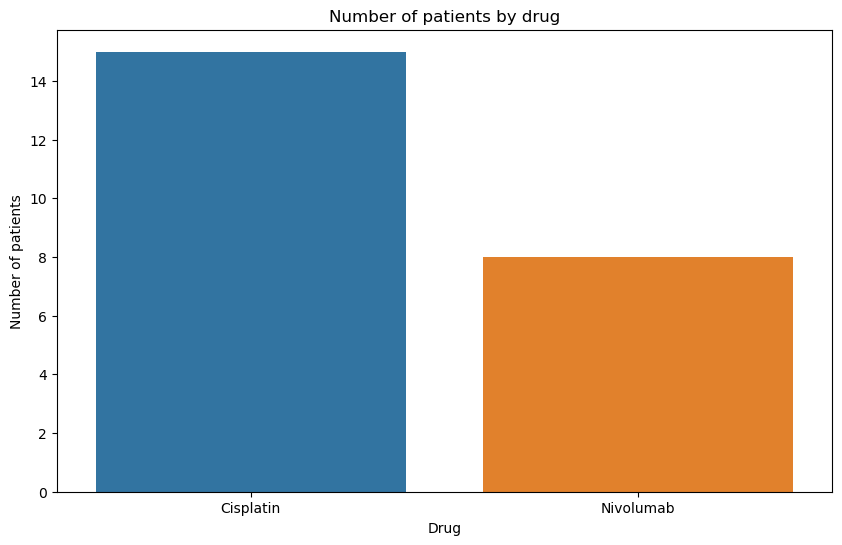

In [55]:
fig = sns.barplot(data=counts, x='Drug', y='PatientID')
plt.title('Number of patients by drug')
plt.ylabel('Number of patients')
plt.xlabel('Drug')
plt.show(fig)

Question 3: Changes to treatment over time
Do we see any changes in treatment patterns over time?

In [34]:
tx['TreatmentStartMonth'] = tx['TreatmentStart'].apply(lambda x: x.replace(day=1))

In [35]:
tx.head()

,level_0,index,PatientID,TreatmentStart,Drug,Dosage,TreatmentStartMonth
0,0,0,PT1,2016-01-14,Cisplatin,200,2016-01-01
1,1,18,PT1,2016-06-17,Nivolumab,240,2016-06-01
2,2,11,PT10,2016-04-07,Nivolumab,240,2016-04-01
3,3,12,PT11,2016-04-17,Cisplatin,190,2016-04-01
4,4,14,PT12,2016-05-15,Cisplatin,1800,2016-05-01


In [56]:
drugs_by_month = tx.groupby(['TreatmentStartMonth', 'Drug']).count()[['PatientID']]
drugs_by_month

PatientID
TreatmentStartMonth Drug                
2016-01-01          Cisplatin          4
2016-02-01          Cisplatin          3
2016-03-01          Cisplatin          3
                    Nivolumab          1
2016-04-01          Cisplatin          2
                    Nivolumab          1
2016-05-01          Cisplatin          2
                    Nivolumab          2
2016-06-01          Cisplatin          1
                    Nivolumab          4

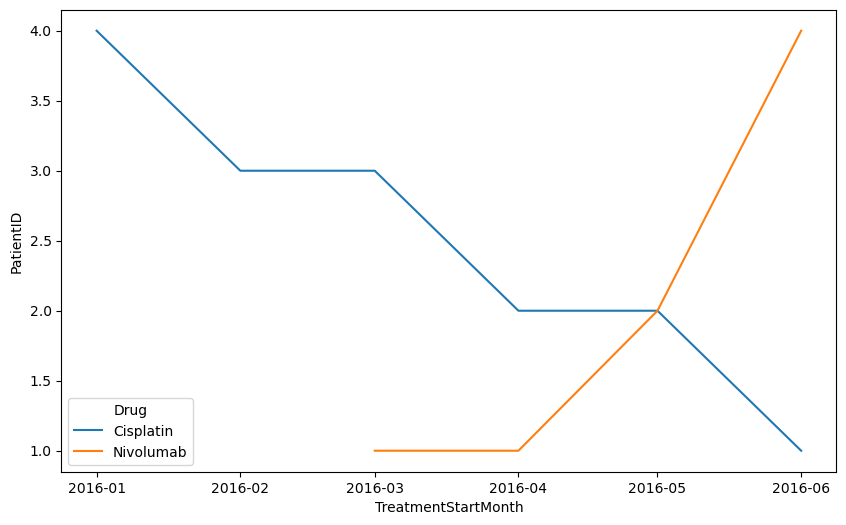

In [37]:
fig = sns.lineplot(data=drugs_by_month.reset_index(), 
                   x='TreatmentStartMonth', 
                   y='PatientID',
                  hue='Drug')

[Optional] Question 4: Dosage and outliers
Question: What is the average dosage of each drug? Are there any outliers?

In [38]:
# An easy first step is to group by the respective drug and use describe()
tx.groupby(['Drug']).describe()

level_0                                                   index  \
            count       mean  min  25%   50%    75%   max       std count   
Drug                                                                        
Cisplatin    15.0  11.866667  0.0  6.5  13.0  17.50  21.0  6.759825  15.0   
Nivolumab     8.0   9.375000  1.0  5.0   8.5  12.75  22.0  6.968039   8.0   

                      ...  Dosage             TreatmentStartMonth  \
                mean  ...     max         std               count   
Drug                  ...                                           
Cisplatin   7.866667  ...  1800.0  419.332803                  15   
Nivolumab  16.875000  ...   240.0    0.000000                   8   

                                                                          \
                          mean                  min                  25%   
Drug                                                                       
Cisplatin  2016-02-26 14:24:00  2016-01-01 00:00:00  2016-01-16 12:00:00   
Nivolumab  2016-05-05 03:00:00  2016-03-01 00:00:00  2016-04-23 12:00:00   

                                                                               
                           50%                  75%                  max  std  
Drug                                                                           
Cisplatin  2016-03-01 00:00:00  2016-04-01 00:00:00  2016-06-01 00:00:00  NaN  
Nivolumab  2016-05-16 12:00:00  2016-06-01 00:00:00  2016-06-01 00:00:00  NaN  

[2 rows x 40 columns]

In [57]:
tx.groupby(['Drug']).agg({'Dosage': 'mean'})

,Dosage
Drug,
Cisplatin,286.0
Nivolumab,240.0


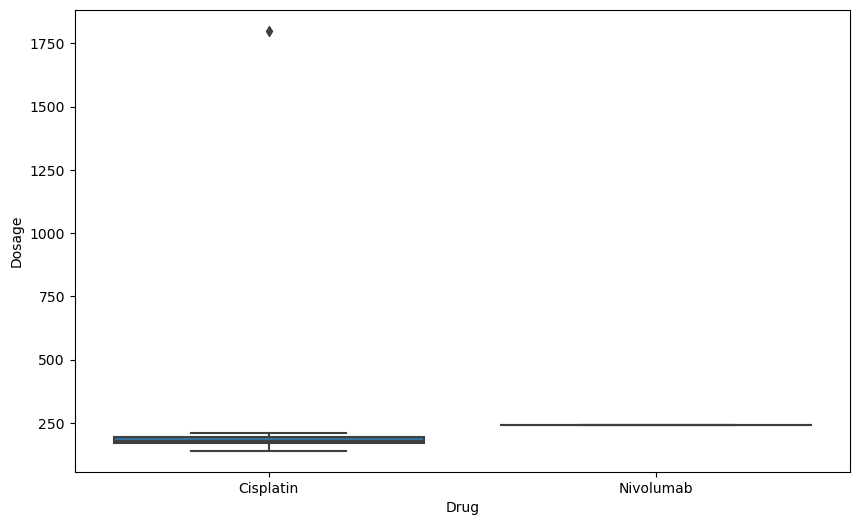

In [41]:
fig = sns.boxplot(data=tx, x='Drug', y='Dosage')
plt.show(fig)

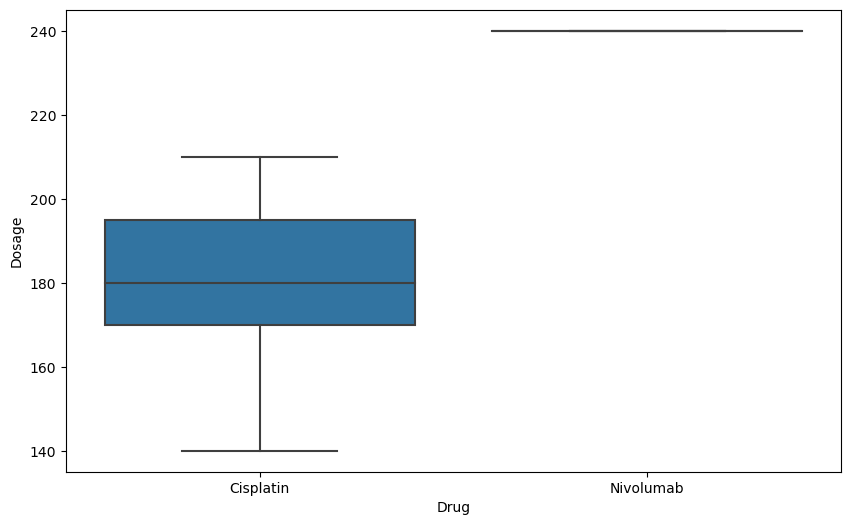

In [42]:
# Use showfliers=False in a boxplot to suppress outliers
fig = sns.boxplot(data=tx, x='Drug', y='Dosage', showfliers=False)
plt.show(fig)